Name:ANAND ALLE
TASK-2:MOVIE RATING PREDICTION WITH PYTHON
CODSOFT


Import libraries

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Load and Read the dataset

In [ ]:
movies=pd.read_csv(r'/content/Movie-Rating.csv')

In [ ]:
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


EDA-Technique
#Exploratory data  analysis

In [ ]:
len(movies)

559

In [ ]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [ ]:
movies.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [ ]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [ ]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating','BudgetMillions','Year']

In [ ]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [ ]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [ ]:
movies.shape

(559, 6)

In [ ]:
movies['Film']

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: object

In [ ]:
movies.Film

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: object

In [ ]:
movies.Film=movies.Film.astype('category')
movies

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [ ]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 43.6+ KB


In [ ]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [ ]:
movies.Genre

0         Comedy
1      Adventure
2         Action
3      Adventure
4         Comedy
         ...    
554       Comedy
555       Comedy
556     Thriller
557       Action
558       Comedy
Name: Genre, Length: 559, dtype: category
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

In [ ]:
movies.Year

0      2009
1      2008
2      2009
3      2010
4      2009
       ... 
554    2011
555    2009
556    2007
557    2009
558    2011
Name: Year, Length: 559, dtype: category
Categories (5, int64): [2007, 2008, 2009, 2010, 2011]

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [ ]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [ ]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


Visualising data

<Axes: title={'center': 'Average Rating by  year'}, xlabel='Year'>

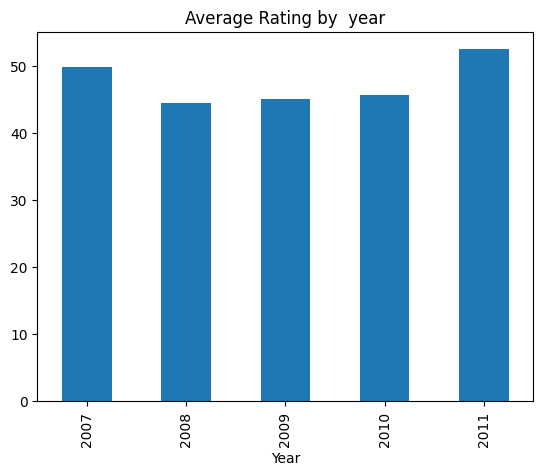

In [ ]:
plt.title('Average Rating by  year')
movies.groupby('Year')['CriticRating'].mean().plot(kind='bar')

Jointplot

* basically joint plot is a scatter plot & it find the relation b/w audiene & critics
* also if you look up you can find the uniform distribution (critics)and normal distriution (audience)


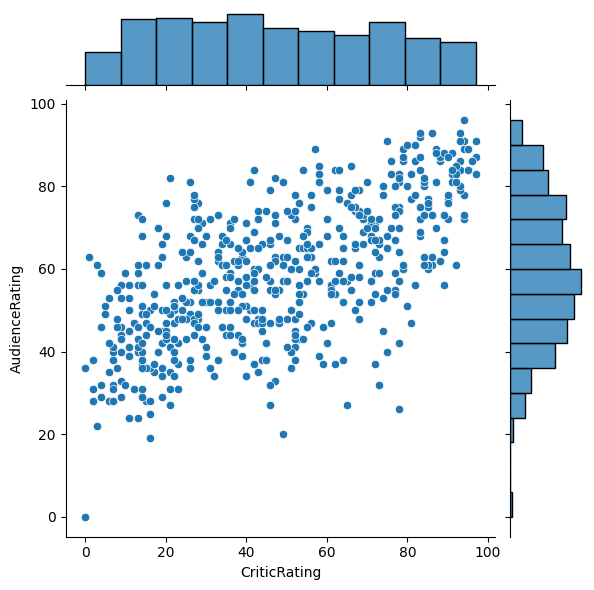

In [ ]:
j = sns.jointplot( data = movies, x = 'CriticRating', y = 'AudienceRating')

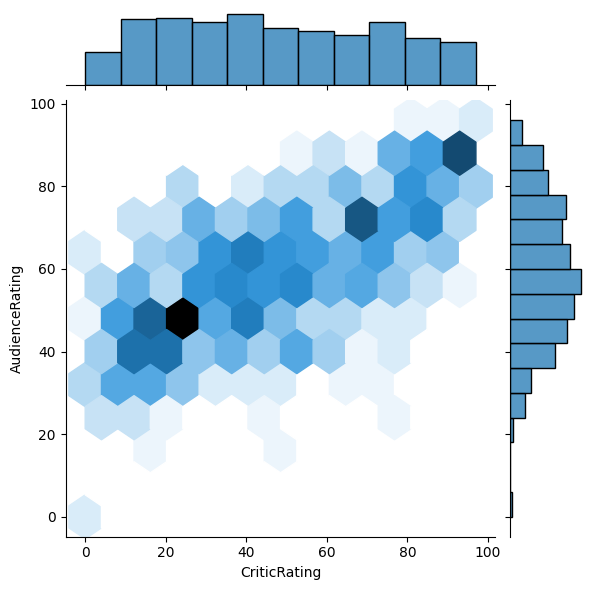

In [ ]:
j = sns.jointplot( data = movies, x = 'CriticRating', y = 'AudienceRating', kind='hex')

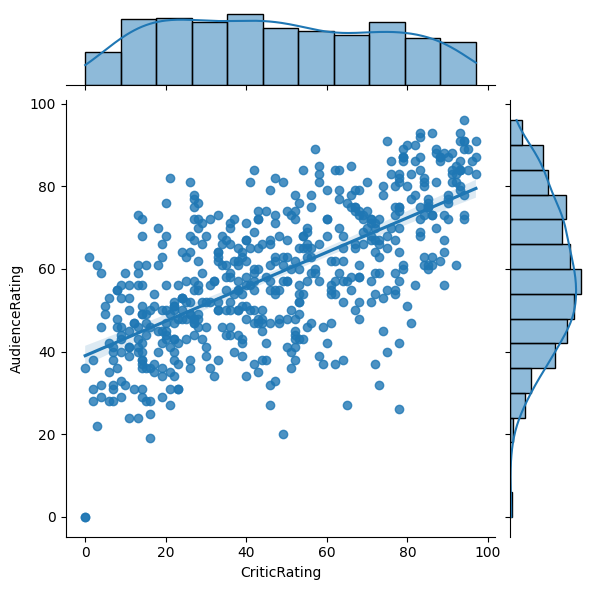

In [ ]:
j = sns.jointplot( data = movies, x = 'CriticRating', y = 'AudienceRating', kind='reg')

Scatterplot

<Axes: title={'center': 'Duration vs Audience ratings'}, xlabel='CriticRating', ylabel='AudienceRating'>

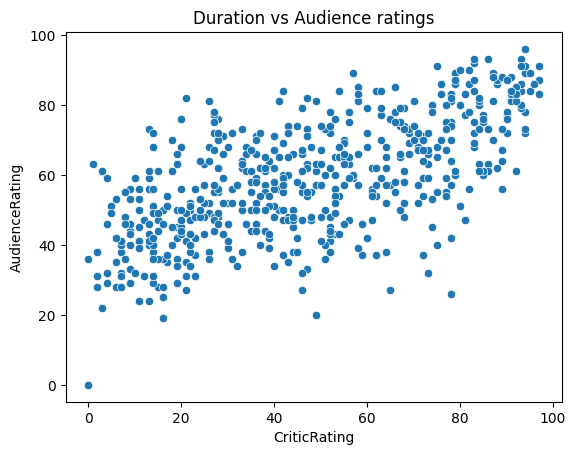

In [ ]:
plt.title("Duration vs Audience ratings")
sns.scatterplot(data=movies,x='CriticRating',y='AudienceRating')

Statistical Analysis

In [ ]:
movies.nunique()

Film              559
Genre               7
CriticRating       98
AudienceRating     74
BudgetMillions     99
Year                5
dtype: int64

In [ ]:
movies.dtypes

Film              category
Genre             category
CriticRating         int64
AudienceRating       int64
BudgetMillions       int64
Year              category
dtype: object

In [ ]:
movies.isna().sum()

Film              0
Genre             0
CriticRating      0
AudienceRating    0
BudgetMillions    0
Year              0
dtype: int64

Distplot

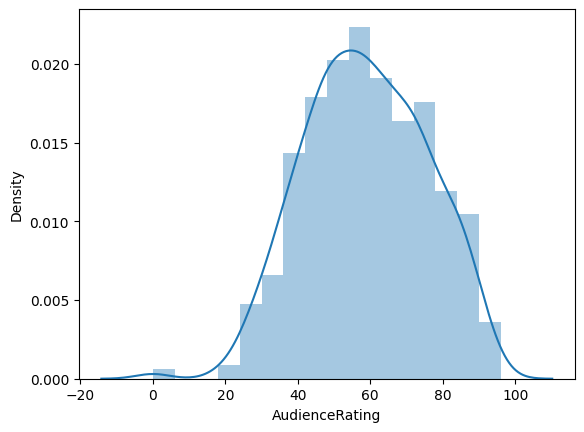

In [ ]:
m1 = sns.distplot(movies.AudienceRating)

In [ ]:
sns.set_style('darkgrid')

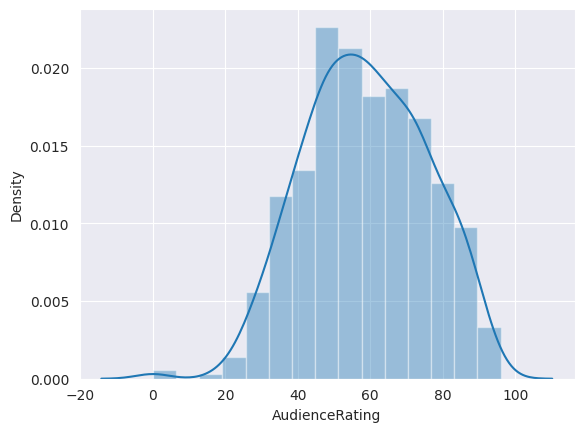

In [ ]:
m2 = sns.distplot(movies.AudienceRating, bins = 15)

Histogram

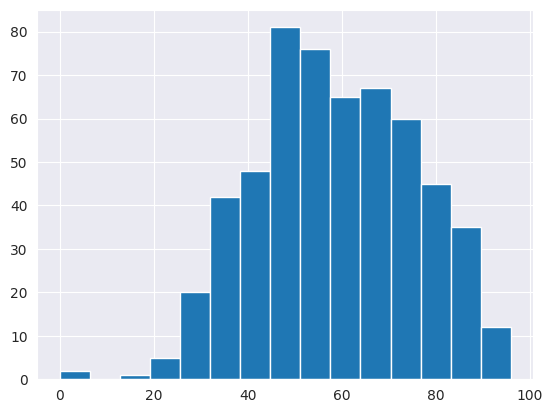

In [ ]:
#sns.set_style('darkgrid')
n1 = plt.hist(movies.AudienceRating, bins=15)

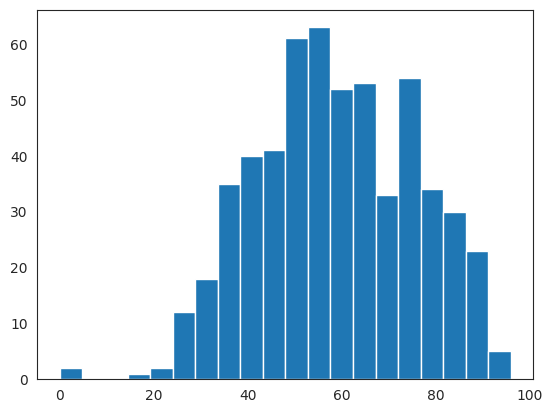

In [ ]:
sns.set_style('white') #normal distribution & called as bell curve
n1 = plt.hist(movies.AudienceRating, bins=20)

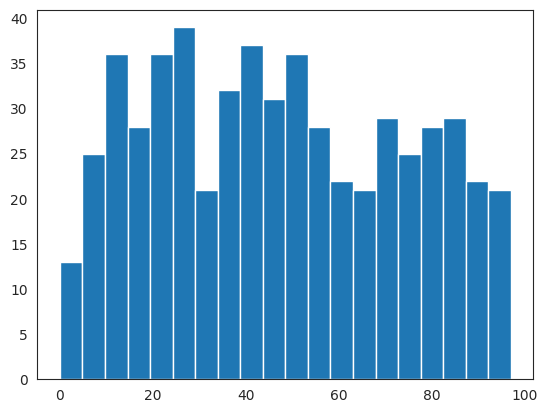

In [ ]:
n1 = plt.hist(movies.CriticRating, bins=20) #uniform distribution



# Creating stacked histograms & this is bit tough to understand

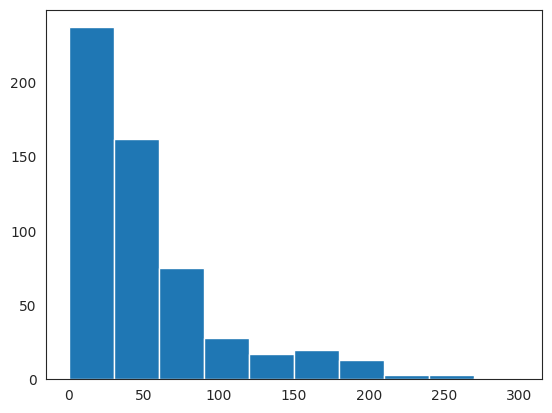

In [ ]:
#h1 = plt.hist(movies.BudgetMillions)

plt.hist(movies.BudgetMillions)
plt.show()

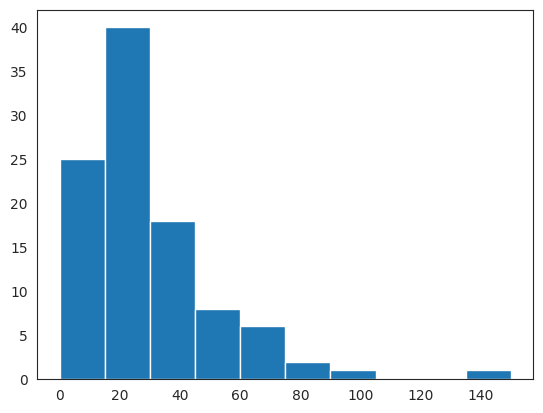

In [ ]:
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.show()

In [ ]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


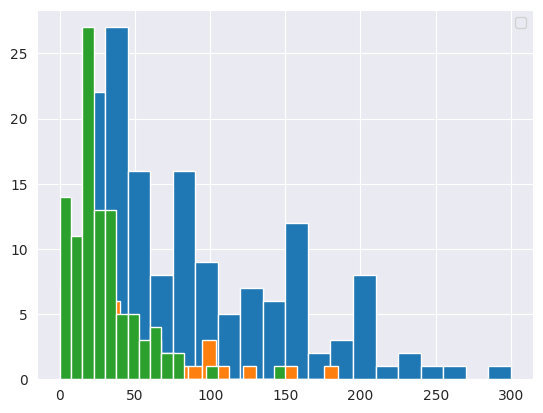

In [ ]:
# Below plots are stacked histogram becuase overlaped

plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 20)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 20)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 20)
plt.legend()
plt.show()

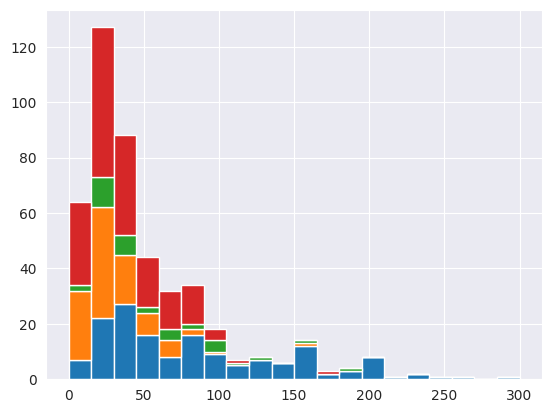

In [ ]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions, \
          movies[movies.Genre == 'Comedy'].BudgetMillions],
         bins = 20, stacked = True)
plt.show()

In [ ]:
# if you have 100 categories you cannot copy & paste all the things

for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


lmplot

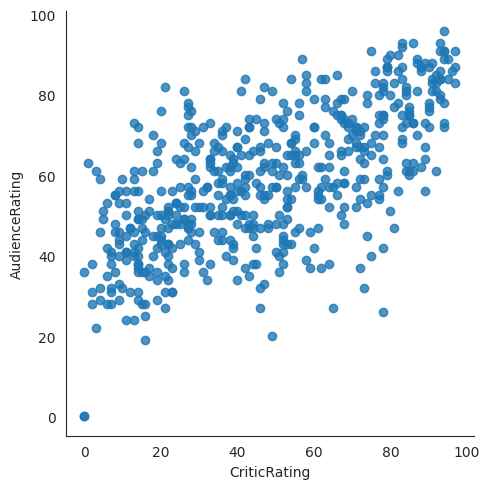

In [ ]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False)

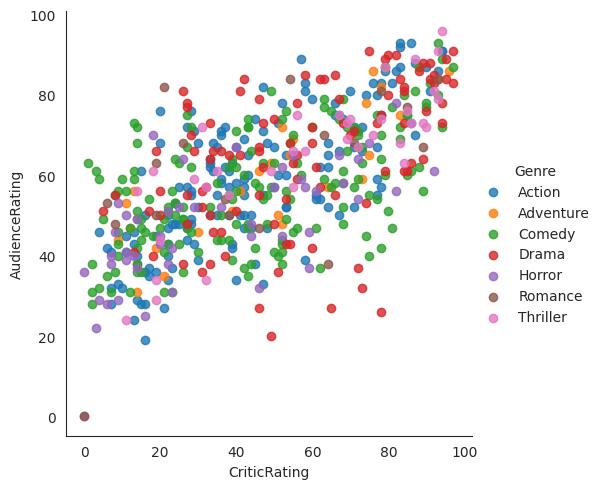

In [ ]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue = 'Genre')

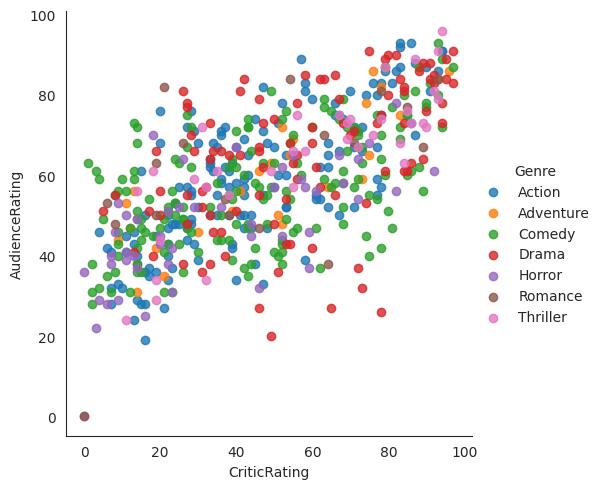

In [ ]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue = 'Genre',aspect=1)


Subplot

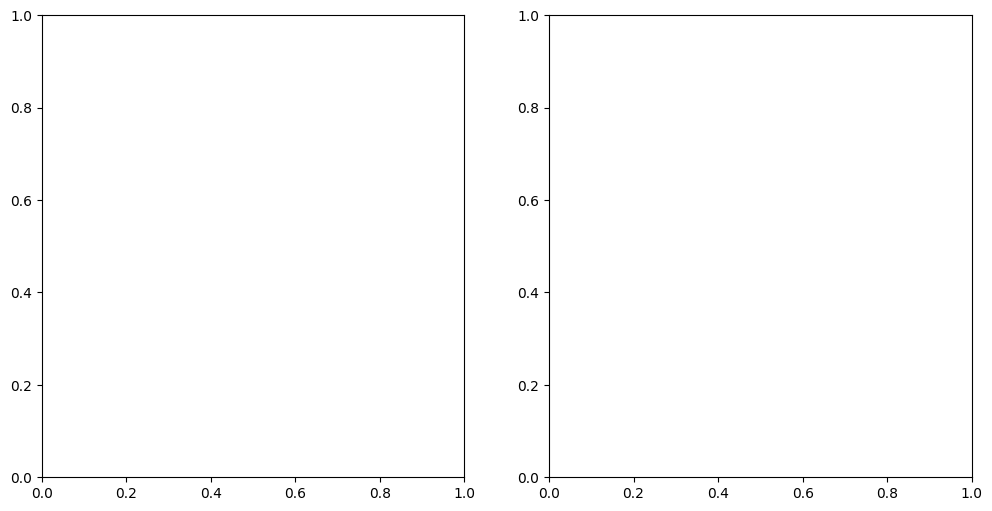

In [ ]:
f, ax = plt.subplots(1,2, figsize =(12,6))

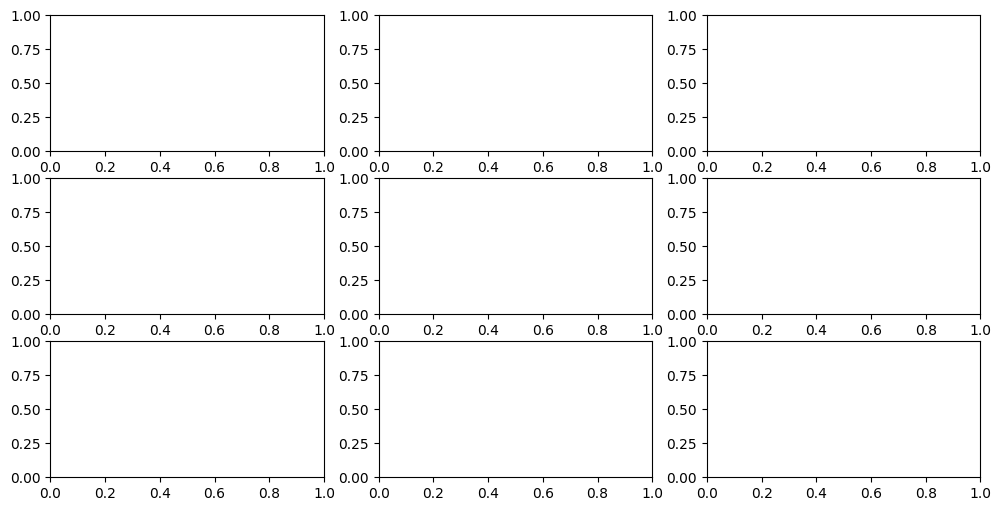

In [ ]:
f, ax = plt.subplots(3,3, figsize =(12,6))

Boxplots

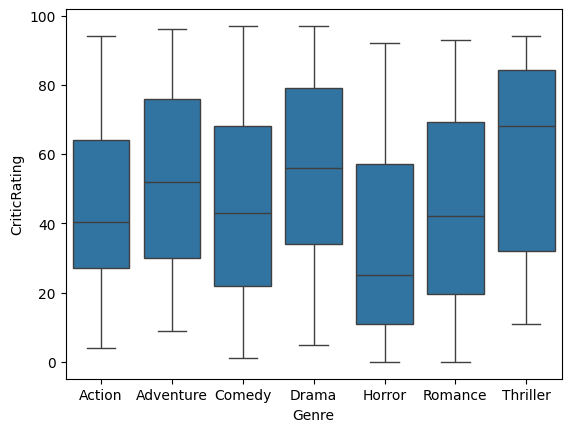

In [ ]:
a=sns.boxplot(data=movies,x='Genre',y='CriticRating')

violin plot

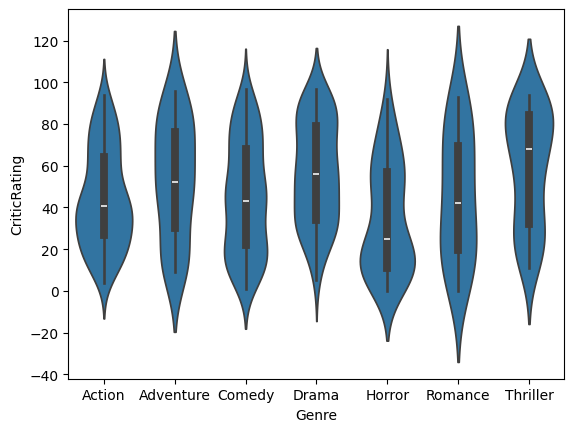

In [ ]:
b=sns.violinplot(data=movies,x='Genre',y='CriticRating')

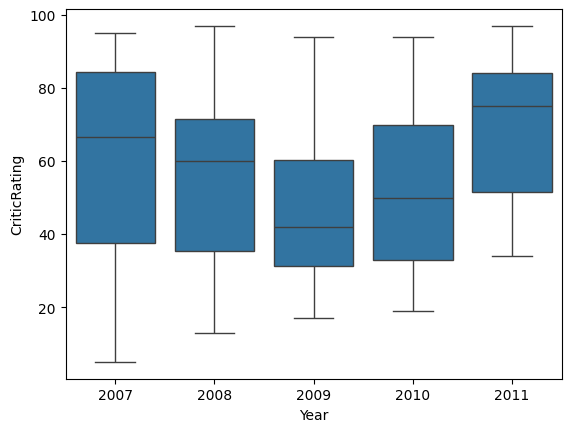

In [ ]:
w1 = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y = 'CriticRating')

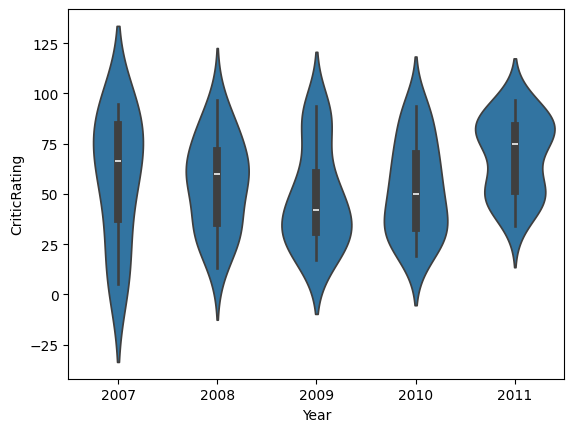

In [ ]:
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y = 'CriticRating')

Facet Grid

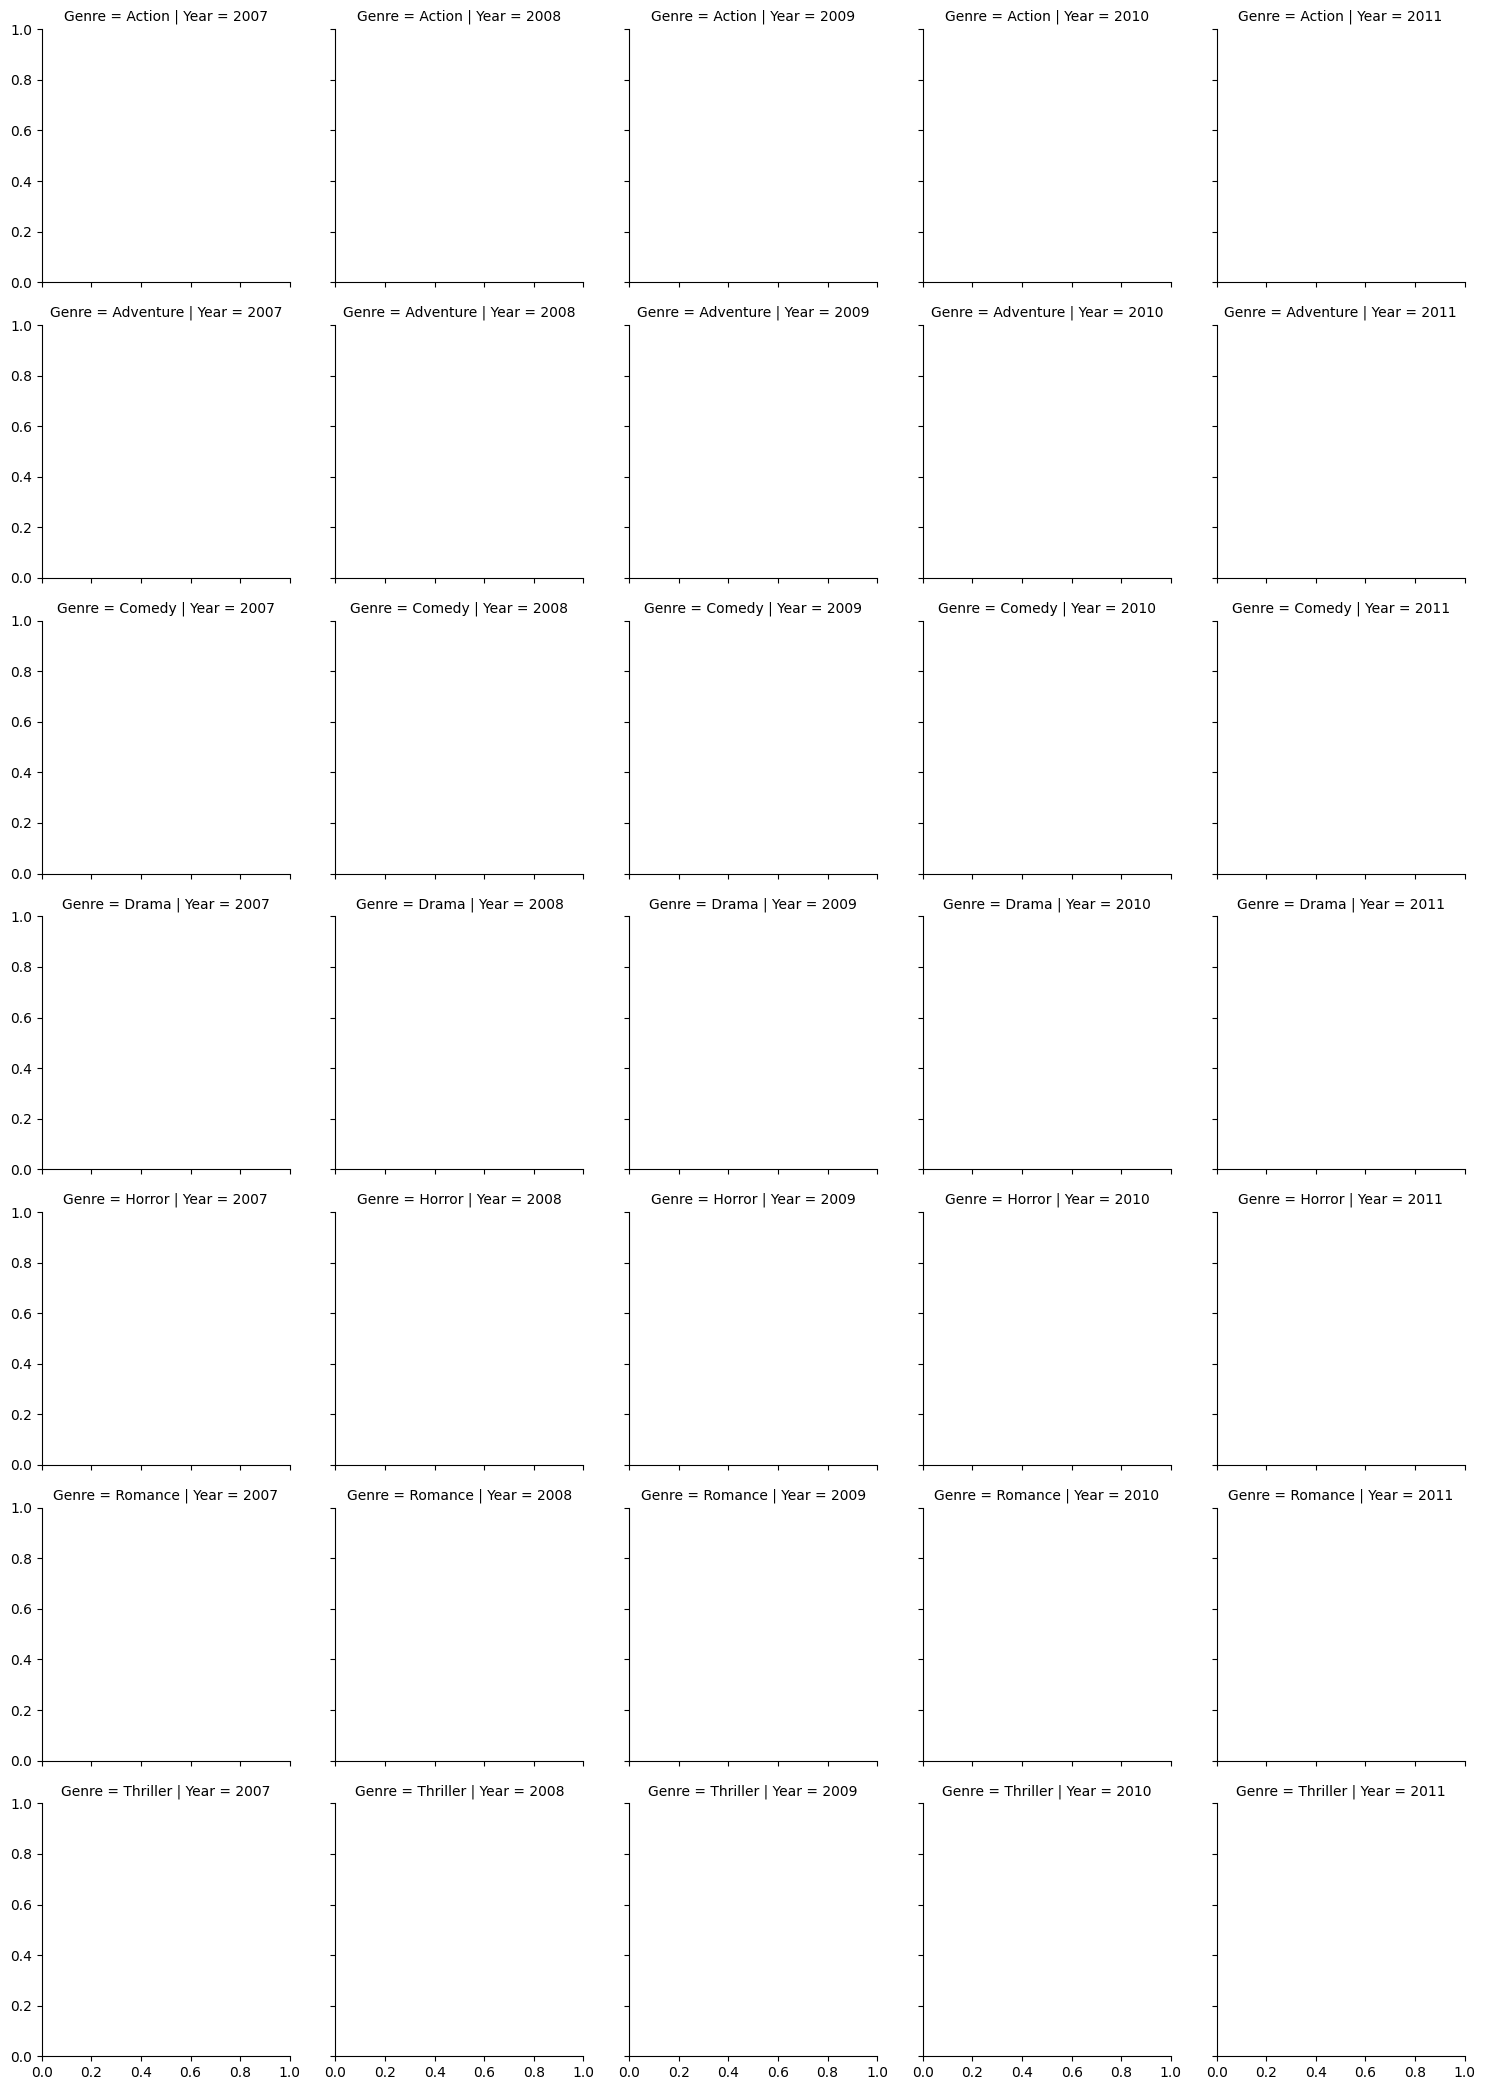

In [ ]:
s=sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')

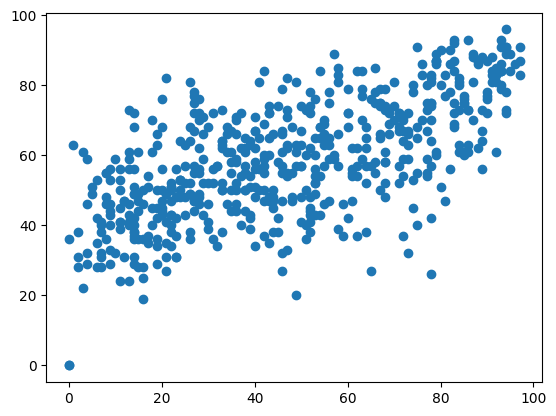

In [ ]:
plt.scatter(movies.CriticRating,movies.AudienceRating)

Facetgrid

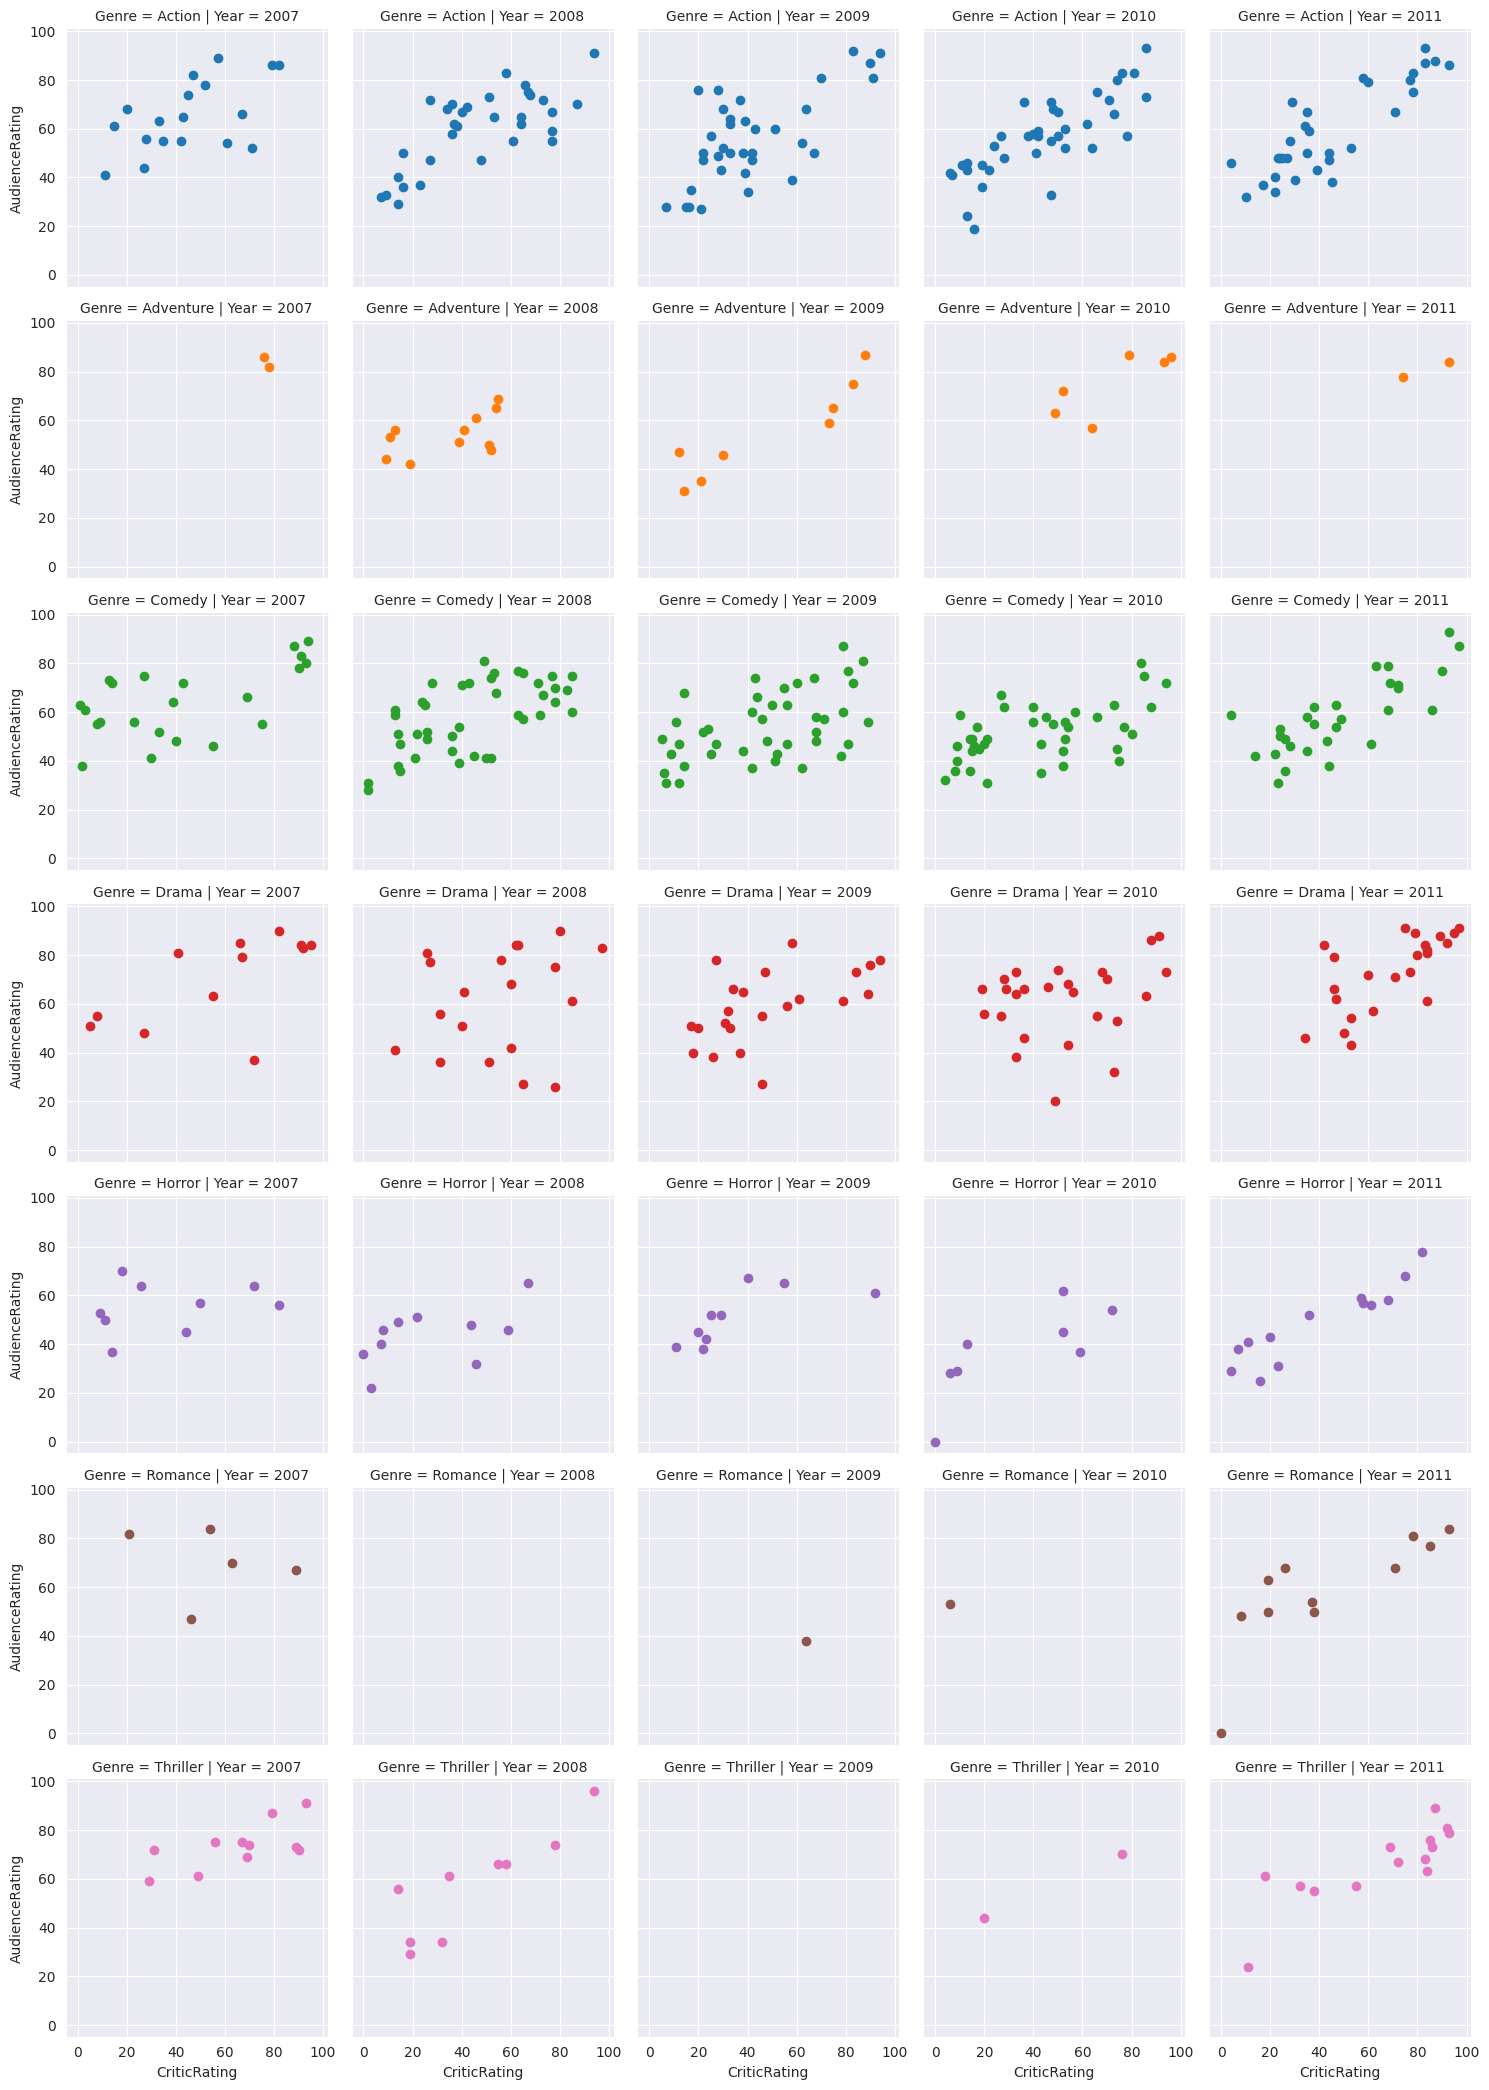

In [ ]:
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating' ) #scatterplots are mapped in facetgrid

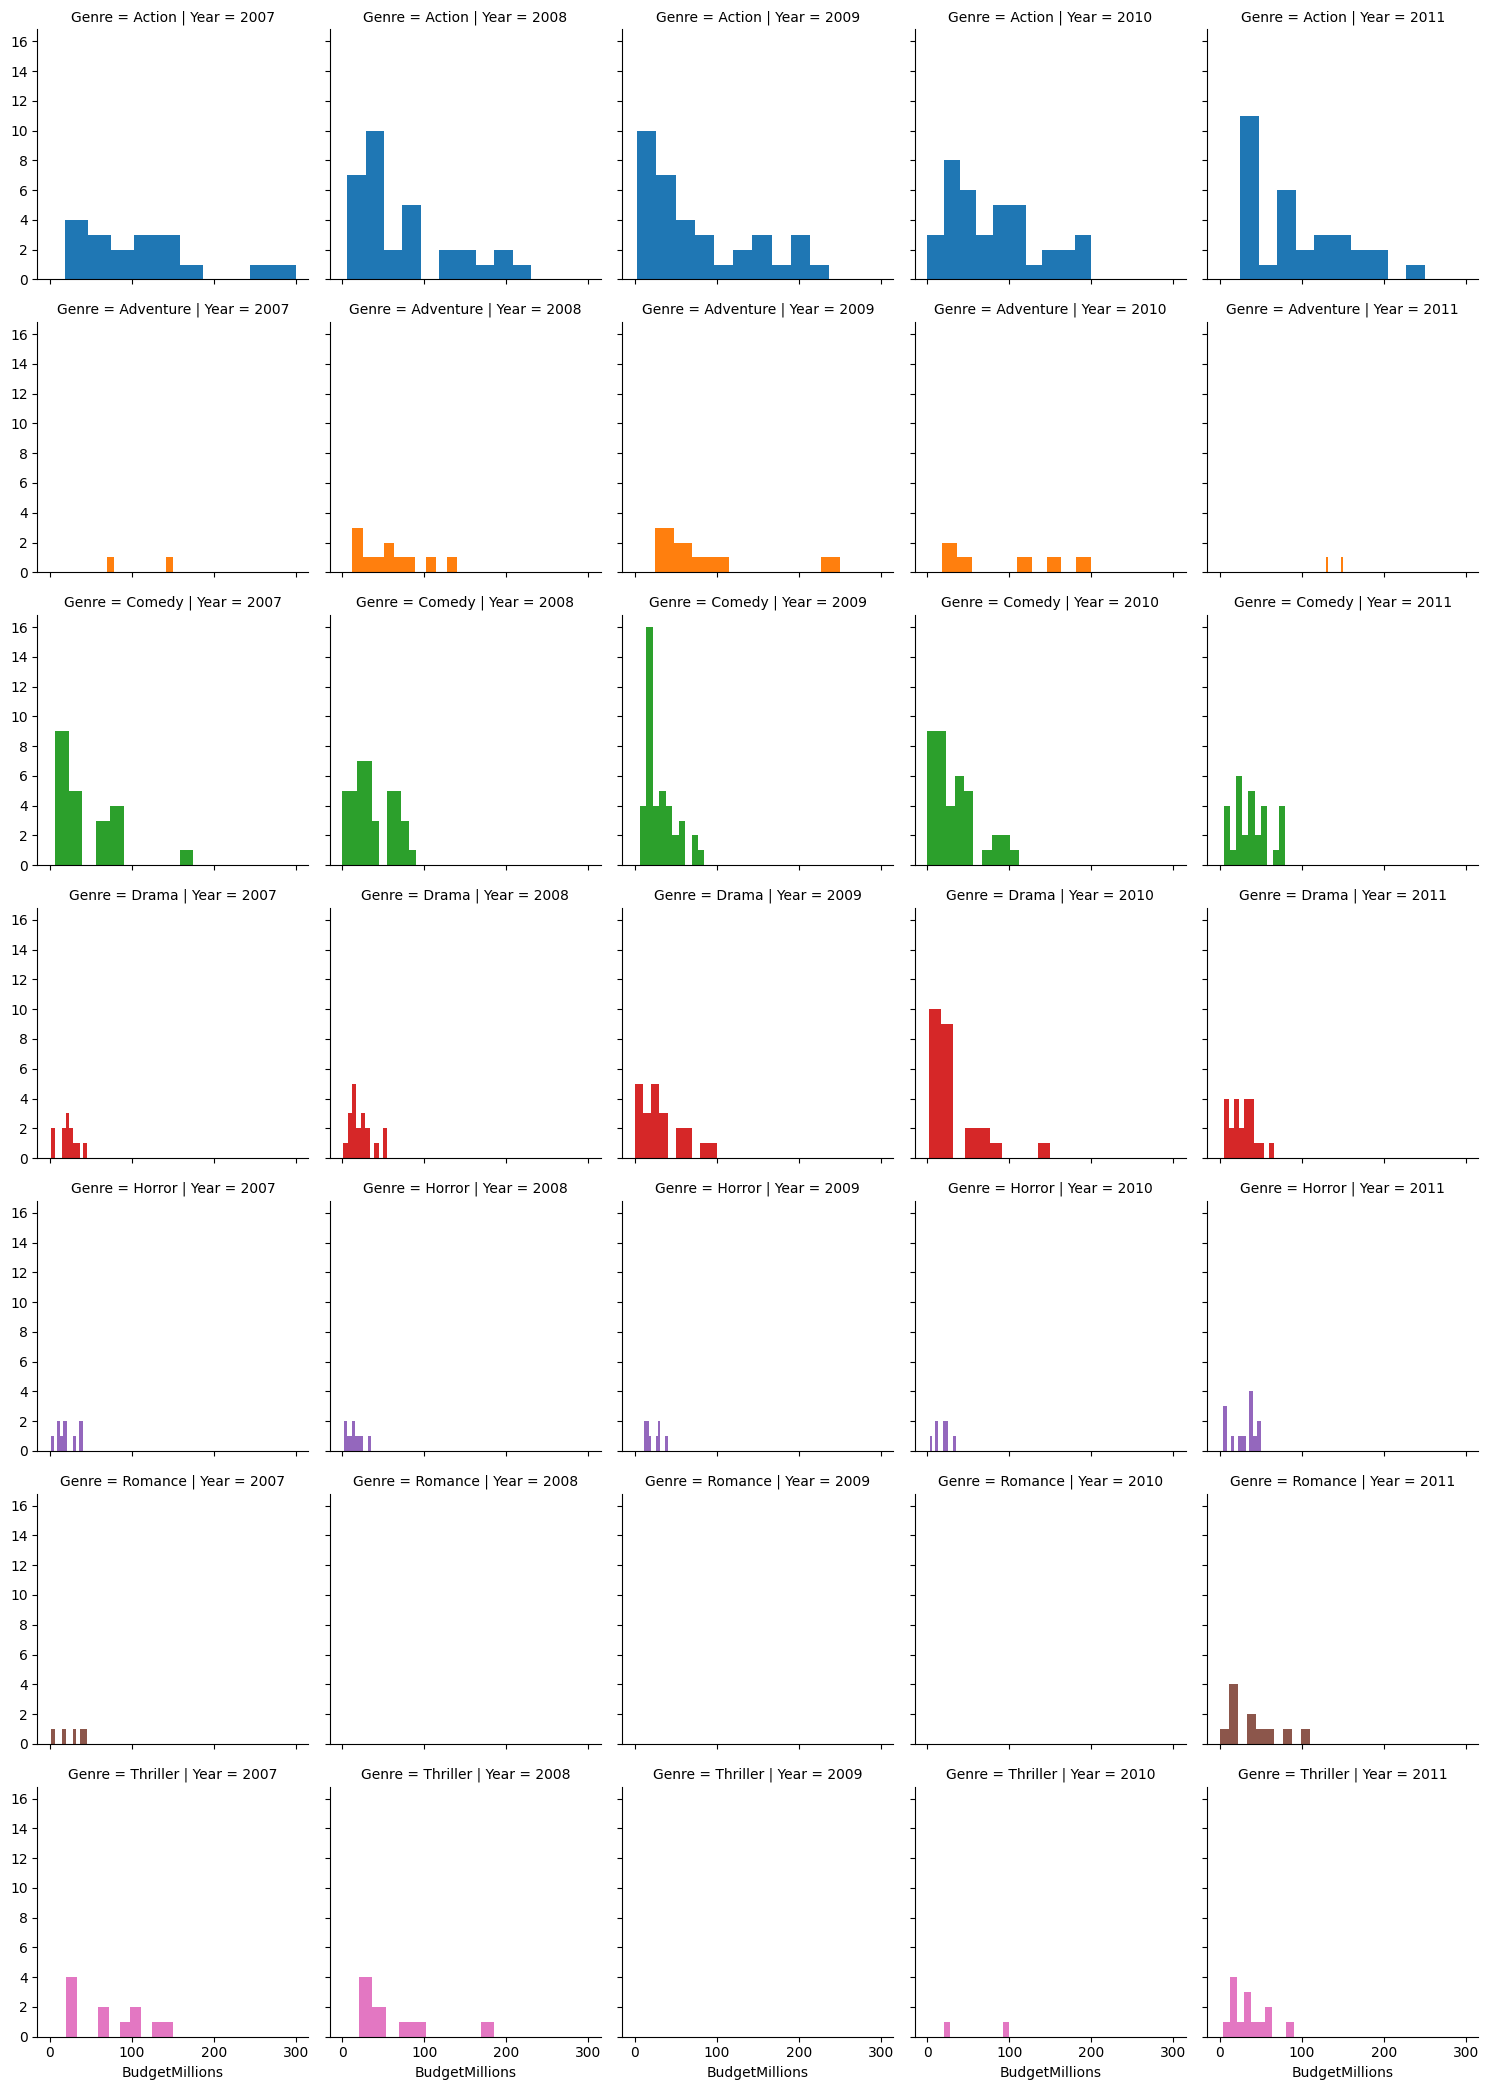

In [ ]:
# you can populated any type of chat.

g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.hist, 'BudgetMillions') #scatterplots are mapped in facetgrid

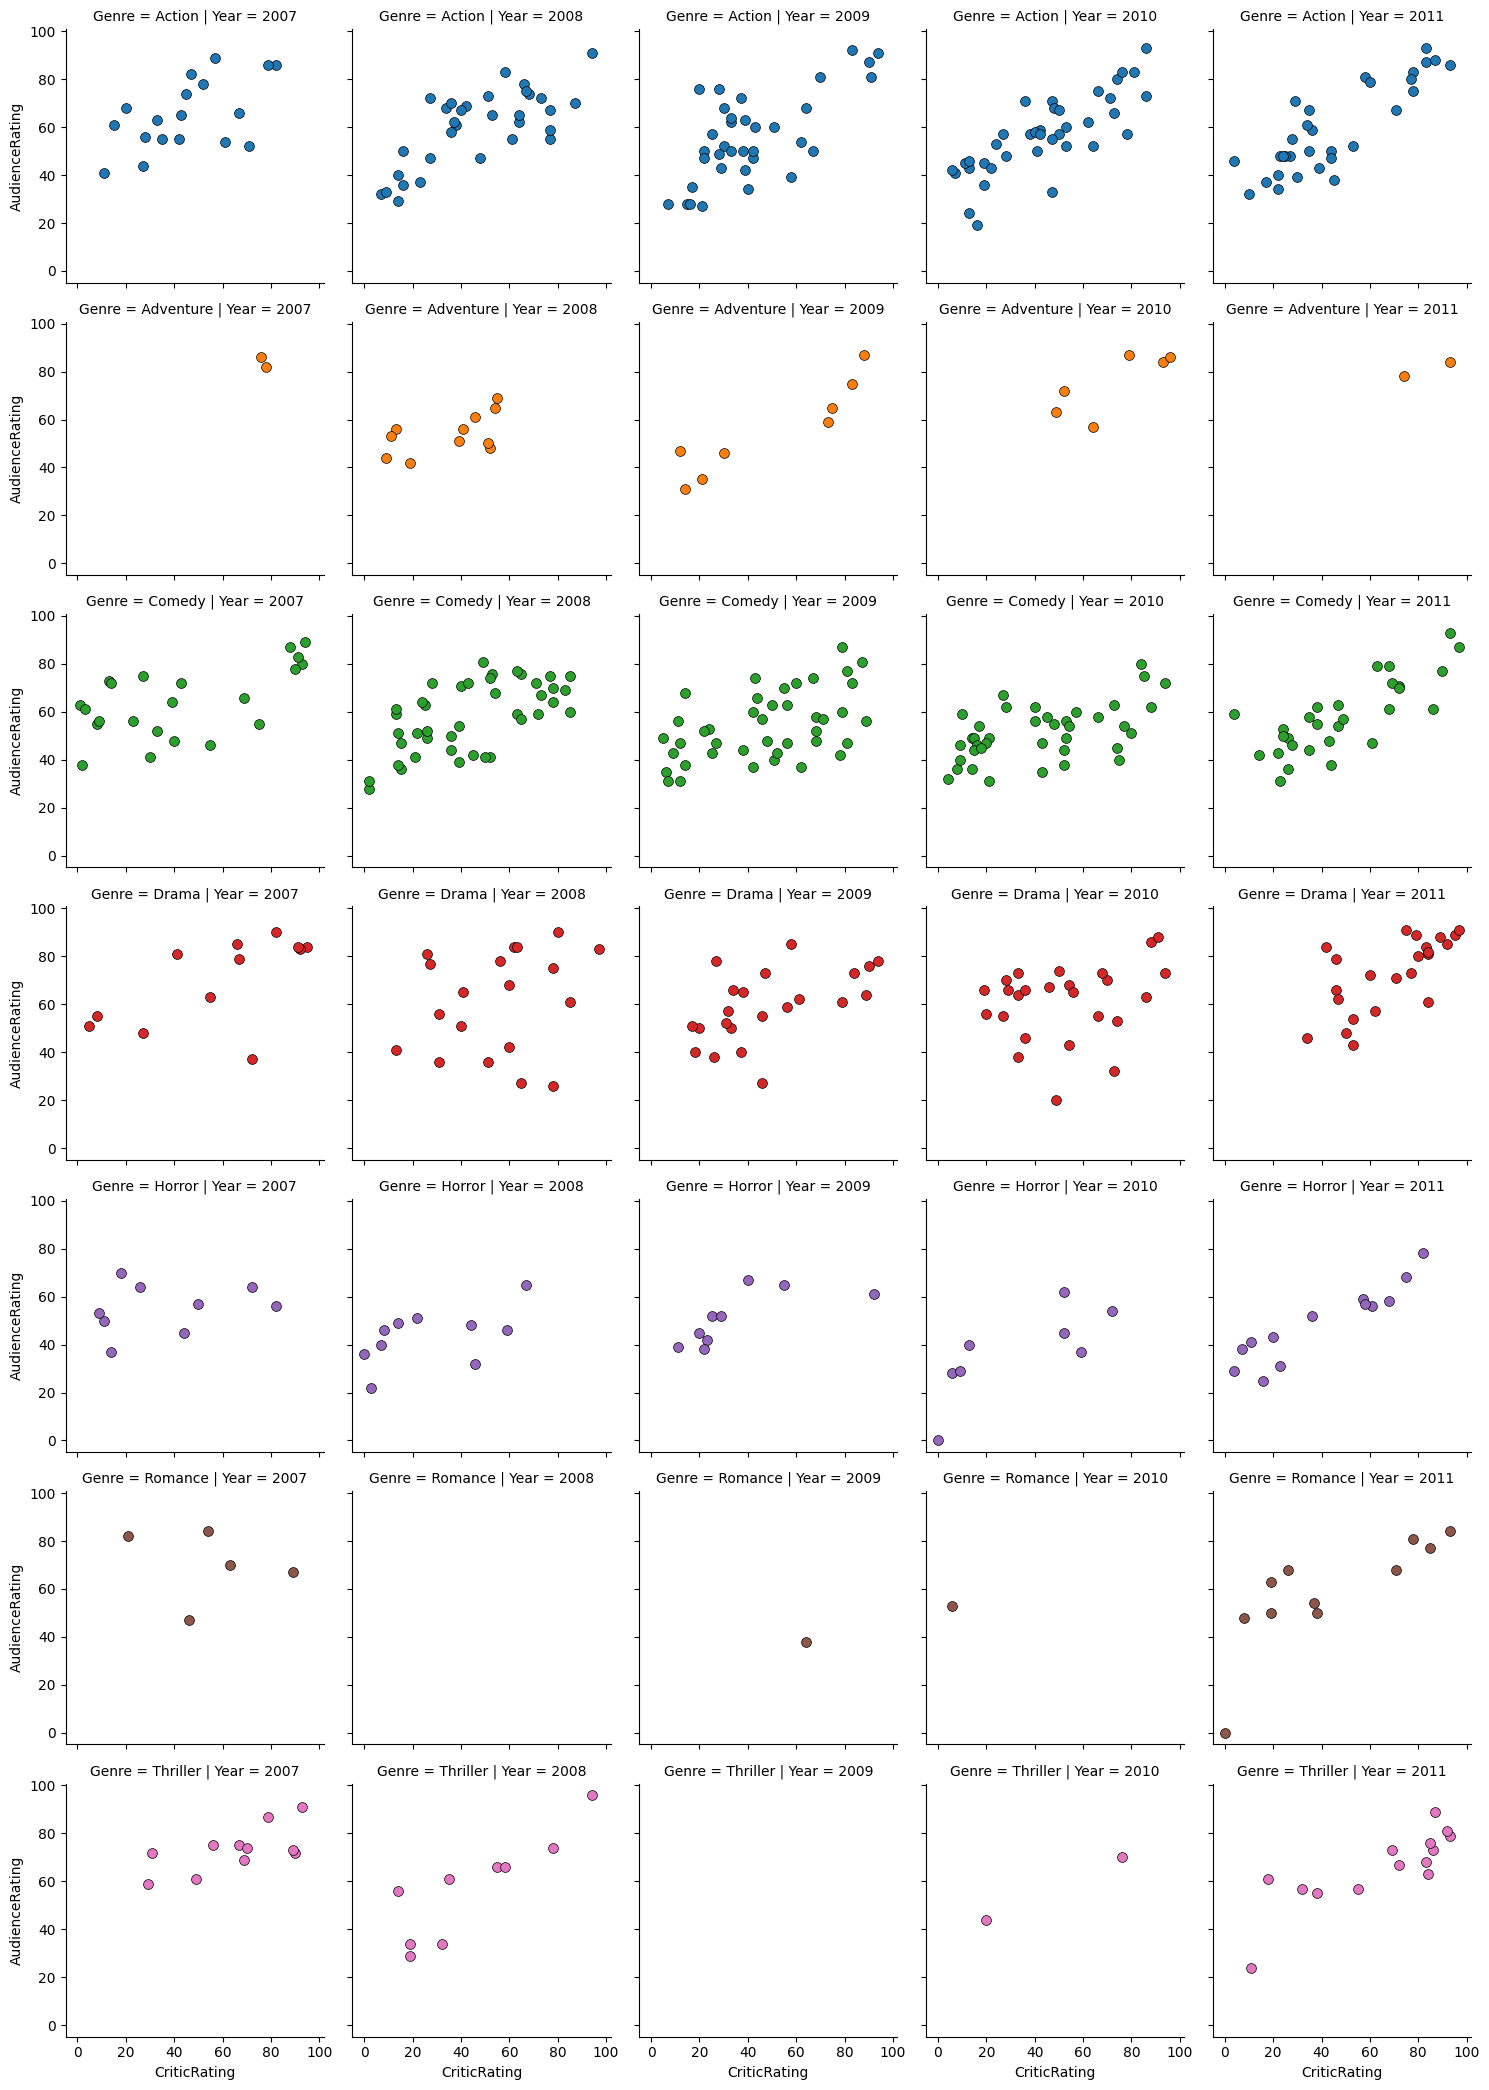

In [ ]:
#
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws ) #scatterplots are mapped in facetgrid

implementation

In [ ]:
x=movies.iloc[:,[2,3]].values
y=movies.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)  #Splitting train and test set

In [ ]:
x

array([[87, 81],
       [ 9, 44],
       [30, 52],
       ...,
       [89, 73],
       [90, 87],
       [14, 42]])

In [ ]:
y

[2009, 2008, 2009, 2010, 2009, ..., 2011, 2009, 2007, 2009, 2011]
Length: 559
Categories (5, int64): [2007, 2008, 2009, 2010, 2011]

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)

In [ ]:
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

MSE: 1.7751505468357005


Support vector machine(SVM)

In [ ]:
SVM=SVR()
SVM.fit(x_train,y_train)

SVR()

In [ ]:
y_pred=SVM.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

MSE: 1.836528908846122


Decissiontree

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=DT.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

MSE: 3.1527777777777777


KNN=k-Nearest neighbour

In [ ]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred=KNN.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

MSE: 1.822142857142854


Random Forest

In [ ]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=RF.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

MSE: 2.005445402982738


Model with Good Performance-DecisionTree,KNN,LinearRegression